# For Age 

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import tensorflow.keras as ks

#unsupervised:
from sklearn.cluster import KMeans
#transformers:
from sklearn.preprocessing import OneHotEncoder, TargetEncoder
from sklearn.base import BaseEstimator, TransformerMixin
import scipy.stats as st

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

#Note: train data has 13 feature column and 1 binary label for a total of 14 columns

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head(4)

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0


In [4]:
train.shape

(165034, 14)

In [5]:
train.Age.describe()

count    165034.000000
mean         38.125888
std           8.867205
min          18.000000
25%          32.000000
50%          37.000000
75%          42.000000
max          92.000000
Name: Age, dtype: float64

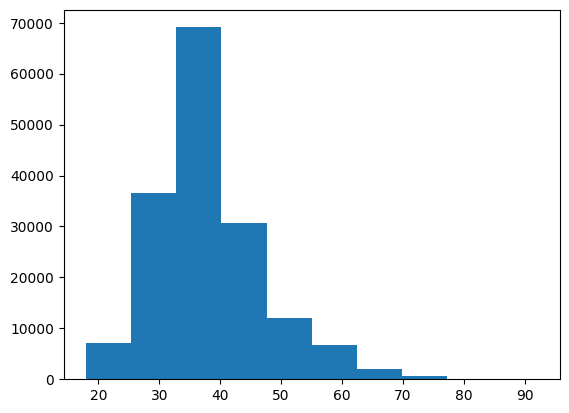

In [13]:
plt.hist(train.Age)
plt.show()

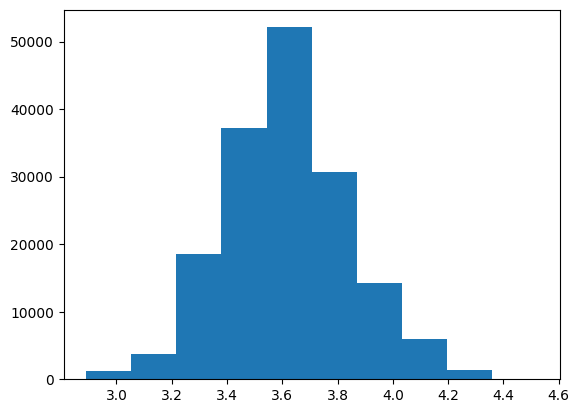

In [15]:
plt.hist(np.log(train.Age))
plt.show()

In [ ]:
# log the age and divide it:


In [7]:
bin_division = [0,20,30,40,50,60,100]
age = pd.cut(train.Age, bins = bin_division)

In [8]:
a = np.array(age).reshape(-1,1)
y = np.array(train.Exited)
tt = TargetEncoder()
tt.fit(a,y)
tt.transform(a)

array([[0.12038585],
       [0.12038585],
       [0.12038585],
       ...,
       [0.12038585],
       [0.08262326],
       [0.12038585]])

In [9]:
z = pd.merge(age,train.Exited, left_index = True, right_index = True)
z.head()

,Age,Exited
0,"(30, 40]",0
1,"(30, 40]",0
2,"(30, 40]",0
3,"(30, 40]",0
4,"(30, 40]",0


In [10]:
contingency = pd.crosstab(index = z.Age, columns = z.Exited, values = z.Exited, aggfunc = "count") 
contingency

Exited,0,1
Age,,
"(0, 20]",612,56
"(20, 30]",25871,2330
"(30, 40]",73812,10102
"(40, 50]",22715,14409
"(50, 60]",4349,6762
"(60, 100]",2754,1262


In [11]:
#The above result shows that it is significant.
result = st.chi2_contingency(contingency)
print("chi-square stat: {}, p_value = {}".format(result.statistic, result.pvalue))

chi-square stat: 24747.605446376314, p_value = 0.0


In [12]:
# Transformer
class AgeLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.targetEncoder = TargetEncoder()

    def fit(self,X,y):
        age = X.Age.apply(lambda z: self.ageDivider(z)) 
        age_1 = np.array(age).reshape(-1,1)
        self.targetEncoder.fit(age_1, y)
        self.rank_encodings = np.sort(self.targetEncoder.encodings_[0])
        return self

    def ageDivider(self, x):
        code = 0
        if x < 24.5:
            code = 0
        if x >= 24.5:
           code = 1
        if x >= 31.5:
            code = 2
        if x >= 38.5:
            code = 3
        if x >= 44.5 :
            code = 4
        if x >= 51.5:
            code = 5
        if x >= 58.5:
            code = 6
        if x >= 65.5:
            code = 7
        if x >= 71.5:
            code = 8
        if x >= 78.5:
            code = 9
        if x >= 85.5:
            code = 10 
        return code

    def transform(self,X):
        age = X.Age.apply(lambda s: self.ageDivider(s))
        age_1 = np.array(age).reshape(-1,1)
        output = self.targetEncoder.transform(age_1)
        return output 
        




In [16]:
# Transformer
class AgeLogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.targetEncoder = TargetEncoder()

    def fit(self,X,y):
        age = np.log(X.Age)
        age = age.apply(lambda z: self.ageDivider(z)) 
        age_1 = np.array(age).reshape(-1,1)
        self.targetEncoder.fit(age_1, y)
        self.rank_encodings = np.sort(self.targetEncoder.encodings_[0])
        return self

    def ageDivider(self, x):
        code = 0
        if x >= 3.1:
           code = 1
        if x >= 3.3:
            code = 2
        if x >= 3.5:
            code = 3
        if x >= 3.7:
            code = 4
        if x >= 3.9:
            code = 5
        if x >= 4.1:
            code = 6
        if x >= 4.3:
            code = 7
        if x >= 4.5:
            code = 8
        return code

    def transform(self,X):
        age = np.log(X.Age)
        age = X.Age.apply(lambda s: self.ageDivider(s))
        age_1 = np.array(age).reshape(-1,1)
        output = self.targetEncoder.transform(age_1)
        return output 
        


